In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


El error porcentual de la distancia entre las funciones lag1(x) y seno(x) es de %5.57088003866
El error porcentual de la distancia entre las funciones lag2(x) y seno(x) es de %0.00125953372875
El error porcentual de la distancia entre las funciones lag3(x) y seno(x) es de %0.000335997569728
El error porcentual de la distancia entre las funciones lin1(x) y seno(x) es de %8.51232225711
El error porcentual de la distancia entre las funciones lin2(x) y seno(x) es de %1.75618227884
El error porcentual de la distancia entre las funciones lin3(x) y seno(x) es de %0.397315273852
El error porcentual de la distancia entre las funciones cub1(x) y seno(x) es de %5.57088003866
El error porcentual de la distancia entre las funciones cub2(x) y seno(x) es de %0.0568801893041
El error porcentual de la distancia entre las funciones cub3(x) y seno(x) es de %0.00121066615614


(1.0, 7.339841164769853e-10)

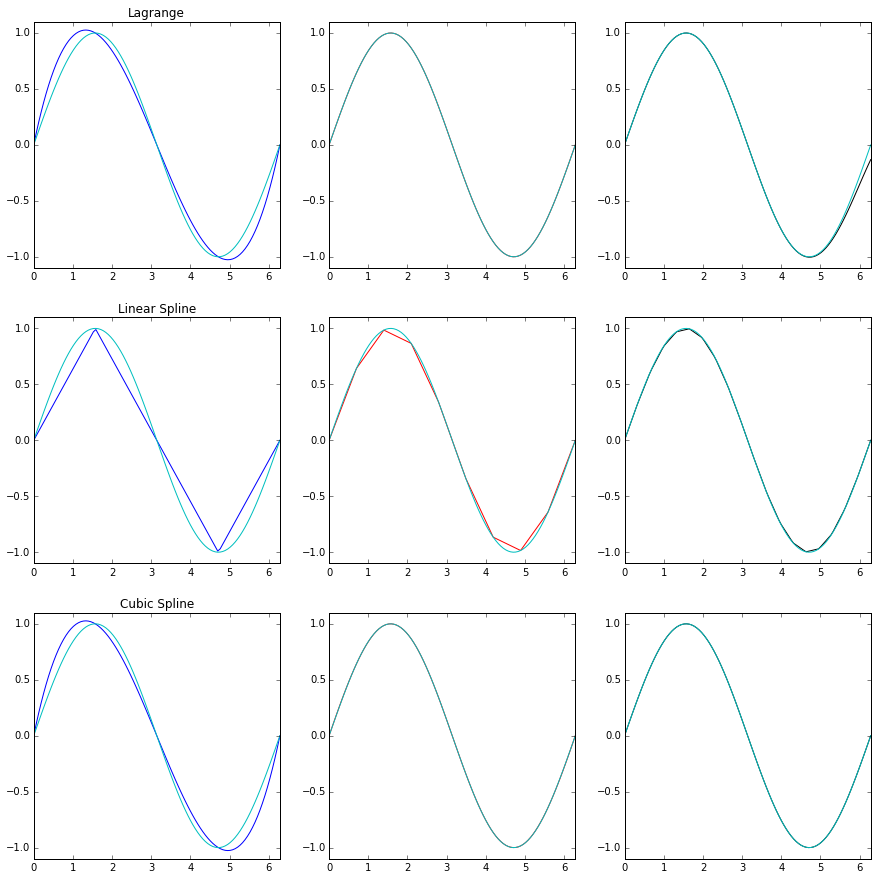

In [8]:
from scipy.interpolate import lagrange, interp1d
from scipy.integrate import quad

x = np.linspace(0,2*np.pi, 100)

x1 = array([0., np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
x2 = np.linspace(0, 2*np.pi, 10)
x3 = np.linspace(0, 2*np.pi, 20)

# Interpolacones con 5 datos
lag1 = lagrange(x1, sin(x1))
lin1 = interp1d(x1, sin(x1), kind = 'slinear')
cub1 = interp1d(x1, sin(x1), kind = 'cubic')

# Interpolacones con 10 datos
lag2 = lagrange(x2, sin(x2))
lin2 = interp1d(x2, sin(x2), kind = 'slinear')
cub2 = interp1d(x2, sin(x2), kind = 'cubic')

# Interpolacones con 20 datos
lag3 = lagrange(x3, sin(x3))
lin3 = interp1d(x3, sin(x3), kind = 'slinear')
cub3 = interp1d(x3, sin(x3), kind = 'cubic')

fig = figure('InterpolacionSeno', figsize = (15, 15))

# Lagrange
ax1 = fig.add_subplot(331)
ax1.set_xlim(0, 2*np.pi)
ax1.set_ylim(-1.1, 1.1)
ax1.plot(x, lag1(x), 'b-')

ax2 = fig.add_subplot(332)
ax2.set_xlim(0, 2*np.pi)
ax2.set_ylim(-1.1, 1.1)
ax2.plot(x, lag2(x), 'r-')

ax3 = fig.add_subplot(333)
ax3.set_xlim(0, 2*np.pi)
ax3.set_ylim(-1.1, 1.1)
ax3.plot(x, lag3(x), 'k-')

tit1 = ax1.set_title("Lagrange")

# Linear Spline
ax4 = fig.add_subplot(334)
ax4.set_xlim(0, 2*np.pi)
ax4.set_ylim(-1.1, 1.1)
ax4.plot(x, lin1(x), 'b-')

ax5 = fig.add_subplot(335)
ax5.set_xlim(0, 2*np.pi)
ax5.set_ylim(-1.1, 1.1)
ax5.plot(x, lin2(x), 'r-')

ax6 = fig.add_subplot(336)
ax6.set_xlim(0, 2*np.pi)
ax6.set_ylim(-1.1, 1.1)
ax6.plot(x, lin3(x), 'k-')

tit2 = ax4.set_title("Linear Spline")

# Cubic Spline
ax7 = fig.add_subplot(337)
ax7.set_xlim(0, 2*np.pi)
ax7.set_ylim(-1.1, 1.1)
ax7.plot(x, cub1(x), 'b-')

ax8 = fig.add_subplot(338)
ax8.set_xlim(0, 2*np.pi)
ax8.set_ylim(-1.1, 1.1)
ax8.plot(x, cub2(x), 'r-')

ax9 = fig.add_subplot(339)
ax9.set_xlim(0, 2*np.pi)
ax9.set_ylim(-1.1, 1.1)
ax9.plot(x, cub3(x), 'k-')

tit3 = ax7.set_title("Cubic Spline")

# Graficación del seno en un color claro en cada gráfico de una interpolación
for i in range(9):
    eval("ax" + str(i+1) + ".plot(x, sin(x), 'c-')")

def sinMod(x):
    return .5 * sin(x)

numDoings = 3

interps = ["lag", "lin", "cub"]

def hola(x): return 1
# Creación e impresión de funciones que evaluen la distancia entre cada una la funciones y calcule el error porcentual. (La distancia está configurada para que la del seno sea 1)

for inter in interps:
    for i in range(1, numDoings + 1):
        # Hace funciones que evalúan el cuadrado de la diferencia entre las funciones
        exec("def " + inter + str(i) + "Integ(x): return (sin(x) -" + inter + str(i) + "(x))**2")

        # Imprime un texto para formato, luego hace la integral del cuadrado anterior, saca su raiz cuadrada y
        # lo escala de modo que esto represente un producto interno, donde la raiz del producto interno de una 
        #función consigo misma sea su magnitud y se escala de modo que el seno tenga una magnitud de 1,
        # y finalmente se multplica por 100 para que sea un porcentaje. 
        print "El error porcentual de la distancia entre las funciones " + inter + str(i) + "(x) y seno(x) es de %" + \
        str(eval("100 * (1/np.pi)* sqrt(quad(" + inter + str(i) + "Integ, 0, np.pi)[0])"))
        exec("def " + inter + str(i) + "Integ(x): return 0.5 * 100 * abs(sin(x) -" + inter + str(i) + "(x))")
        print "El error porcentual de la distancia entre las funciones " + inter + str(i) + "(x) y seno(x) es de " + \
        str(eval("np.sqrt(quad(" + inter + str(i) + "Integ, 0, np.pi)[0])"))
    print 

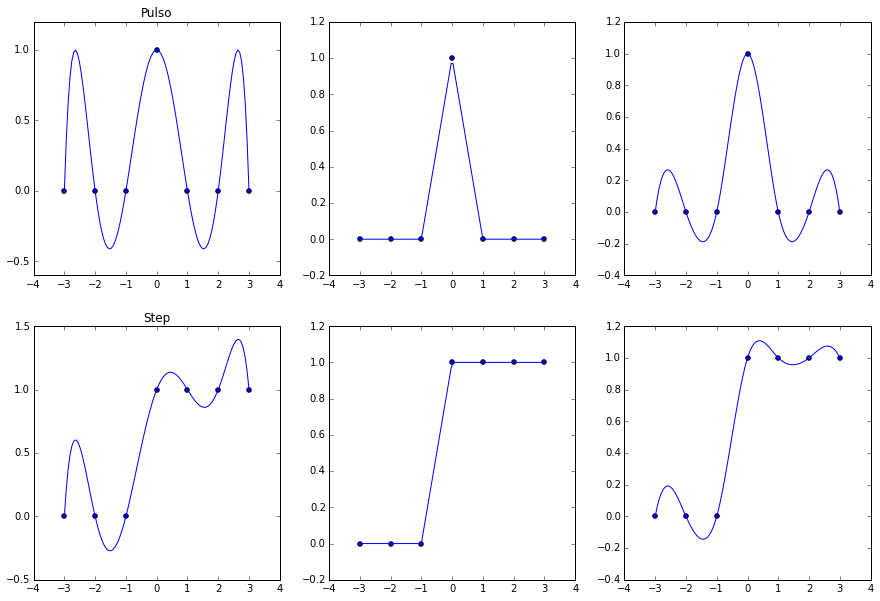

In [4]:
from scipy.interpolate import lagrange, interp1d

xd = array([-3., -2., -1., 0., 1., 2., 3.])
yp = array([0., 0., 0., 1., 0., 0., 0.])
ys = array([0., 0., 0., 1., 1., 1., 1.])

x = np.linspace(-3, 3, 100)

lagp = lagrange(xd, yp)
linp = interp1d(xd, yp, kind = 'slinear')
cubp = interp1d(xd, yp, kind = 'cubic')

lags = lagrange(xd, ys)
lins = interp1d(xd, ys, kind = 'slinear')
cubs = interp1d(xd, ys, kind = 'cubic')

fig = figure('Pulso y Step', figsize = (15, 10))

ax1 = fig.add_subplot(231)
ax1.set_title("Pulso")
ax1.plot(x, lagp(x))

ax2 = fig.add_subplot(232)
ax2.plot(x, linp(x))

ax3 = fig.add_subplot(233)
ax3.plot(x, cubp(x))

ax4 = fig.add_subplot(234)
ax4.set_title("Step")
ax4.plot(x, lags(x))

ax5 = fig.add_subplot(235)
ax5.plot(x, lins(x))

ax6 = fig.add_subplot(236)
ax6.plot(x, cubs(x))

for i in range(1, 4):
    sp = plt.subplot(2,3,i)
    sp.scatter(xd, yp)
    
for i in range(4, 7):
    sp = plt.subplot(2,3,i)
    sp.scatter(xd, ys)

|x|y|
|---|---|
|0.401578257307|1.89721245448|
|0.439070451882|1.74783277321|
|0.486775909123|1.53090371214|
|0.899535003996|-0.552934453477|
|1.37279139707|-1.37505157789|
|1.53814830805|-0.927542689061|
|1.5874383343|-0.754465320706|
|1.6584928834|-0.486900793923|
|1.87533140645|0.342382697599|
|1.88252244657|0.367452508297|
|1.90602338499|0.447395201403|
|1.95787936022|0.612902900609|
|1.96103375098|0.622482004454|
|2.40649706564|1.38026413562|
|2.64895088339|1.41364789853|
|3.27899039159|1.16712575766|
|3.35682161471|1.08799212078|
|3.54955029333|0.863068952763|
|3.63160089431|0.758495386832|
|3.67435100413|0.702714253038|
|3.81064966587|0.52191338726|
|4.11938791836|0.126995247237|
|4.39159626245|-0.0969158100297|
|4.42446101482|-0.0900554095206|


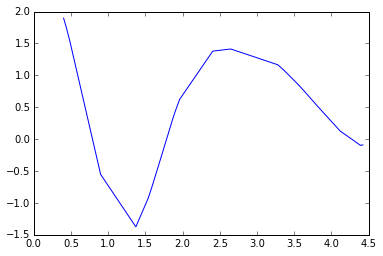

In [20]:
data = genfromtxt('tabla.tsv', delimiter = '\t')

xd = data[:, 0]
yd = data[:, 1]

# Interpolación de los datos
cub = interp1d(xd, yd, kind = 'cubic')

fig = figure('Punto 3')
ax = fig.add_subplot(111)

# Generación de x's uniformemente espaciados
#x = np.linspace(min(xd), max(yd), len(xd))
x = array([])
for i in range(len(xd)):
    x = np.append(x, [np.random.uniform(min(xd), max(xd))])

x = np.sort(x)

line, = ax.plot(x, cub(x))

xNew = line.get_xdata()
yNew = line.get_ydata()

print "|x|y|"
print "|---|---|"
for i in range(len(x)):
    print "|" + str(xNew[i]) + "|" + str(yNew[i]) + "|"